# Creating Dummy Variables from Categorical Features in Python!

## Introduction

Many of the data sets with which data scientists work commonly contain categorical features; i.e., variables that record information about the categories to which a subject or item of interest belongs. Generally speaking, these categorical features can be subdivided into two types: (1) *dichotomous features*, and (2) *polychotomous features*. Dichotomous features are variables for which there are only two possible categories. Examples of dichotomous features might include measures such as gender (male/female), student level (undergraduate/graduate), smartphone ownership (yes/no), etc. Polychotomous features are variables for which there are more than two possible categories. Examples of polychotomous features might include measures such as favorite color (red, green, blue, etc.), type of vehicle (car, truck, boat, airplane, etc.), type of movie (comedy, drama, sci-fi, documentary, etc.), and so on.

## Dummy Variables

In order to include categorical features in statistical analyses or machine learning projects, the categorical features must be transformed into one or more *dummy variables*. A dummy variable is a a binary variable that has only two possible values (typically 0 or 1), which can be used to indicate whether or not a subject or item of interest belongs to a particular category. Put differently, dummy variables are used to numerically encode categorical memberships. Consider the following examples that show how dummy variables can be used to encode dichotomous and polychotomous categorical features:
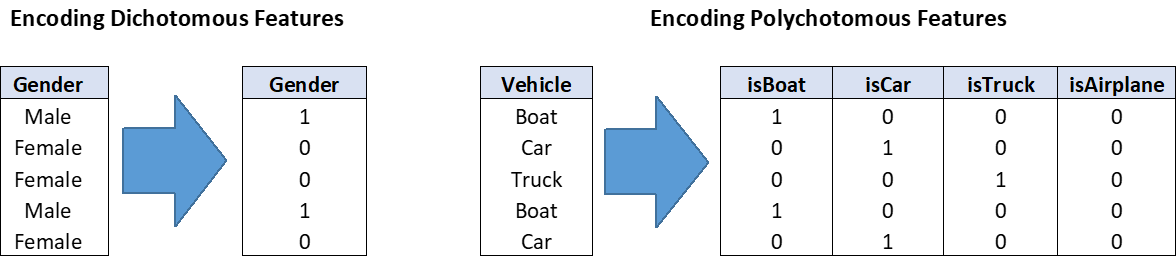

## Encoding Dichotomous Categorical Features

When working with a dichotomous categorical feature, the easiest way to convert textual category labels into a binary dummy variable is simply to use the *replace()* function We'll use the Galton Families dataset to illustrate this approach:

In [9]:
#import  statsmodels library
import statsmodels.api as sm

#get the Galton Families dataset and assign it to a pandas dataframe
df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

#view the first 10 rows of data in the dataframe
df.head(10)

family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1    male   
1    001    78.5    67.0            75.43         4         2  female   
2    001    78.5    67.0            75.43         4         3  female   
3    001    78.5    67.0            75.43         4         4  female   
4    002    75.5    66.5            73.66         4         1    male   
5    002    75.5    66.5            73.66         4         2    male   
6    002    75.5    66.5            73.66         4         3  female   
7    002    75.5    66.5            73.66         4         4  female   
8    003    75.0    64.0            72.06         2         1    male   
9    003    75.0    64.0            72.06         2         2  female   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  
5         72.5  
6         65.5  
7         65.5  
8         71.0  
9         68.0

As you can see, the *gender* variable is a dichotomous categorical feature with two possible values (*male* and *female*). Let's use the *replace()* function to convert this feature into a binary dummy variable:

In [10]:
#define a dictionary that specifies current and replacement values
genderCodes = {'male': 1, 'female': 0}

#use the dictionary to replace the current textual gender labels with a 0 or 1
df['gender'].replace(genderCodes, inplace=True)

#view the first 10 rows of data in the dataframe
df.head(10)

family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1       1   
1    001    78.5    67.0            75.43         4         2       0   
2    001    78.5    67.0            75.43         4         3       0   
3    001    78.5    67.0            75.43         4         4       0   
4    002    75.5    66.5            73.66         4         1       1   
5    002    75.5    66.5            73.66         4         2       1   
6    002    75.5    66.5            73.66         4         3       0   
7    002    75.5    66.5            73.66         4         4       0   
8    003    75.0    64.0            72.06         2         1       1   
9    003    75.0    64.0            72.06         2         2       0   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  
5         72.5  
6         65.5  
7         65.5  
8         71.0  
9         68.0

Now that the textual gender labels have been replaced with values of 0 (female) and 1 (male), we can apply quantitative methods to the *gender* variable:

In [11]:
#show the proportion of subjects who are male
df['gender'].mean()

0.5149892933618844

## Encoding Polychotomous Categorical Features

When working with a polychotomous categorical feature, the easiest way to convert textual category labels into a series of binary dummy variables is to use a two-step process that relies on functions in the *sklearn.preprocessing* library. We'll use these functions in conjunction with the iris dataset to illustrate this technique:

In [12]:
#get the iris dataset and assign it to a pandas dataframe
df = sm.datasets.get_rdataset('iris').data

#view the first 10 rows of data in the dataframe
df.head(10)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

As you can see, the dataset contains a categorical *Species* feature. Let's verify that this is a polychotomous categorical feature:

In [13]:
#display all of the unique values in the 'Species' column
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We now know that the *Species* column is a polychotomous categorical feature, since it contains three unique categories (i.e., *setosa*, *versicolor*, and *virginica*). The data in the *Species* column will therefore need to be encoded into a series of three binary dummy variables. Let's see how to do this in Python...
#### Step 1: Converting Textual Category Labels into Numbers
The first step is to convert the textual category labels (*setosa*, *versicolor*, and *virginica*) into numbers (0, 1, and 2). After this step is complete, the species for each iris in the dataset will be represented by a number, rather than by a textual label:

In [14]:
#import the sklearn.preprocessing library
from sklearn import preprocessing

#assign the species labels to a variable
speciesLabels = df['Species']

#define a label encoder object
enc = preprocessing.LabelEncoder()

#transform the textual labels into numbers, and store the result in a 'SpeciesNumber' column
enc.fit(speciesLabels)
speciesLabels = enc.transform(speciesLabels)
df['SpeciesNumber'] = speciesLabels

#show the dataset
df[['Species', 'SpeciesNumber']]

Species  SpeciesNumber
0       setosa              0
1       setosa              0
2       setosa              0
3       setosa              0
4       setosa              0
5       setosa              0
6       setosa              0
7       setosa              0
8       setosa              0
9       setosa              0
10      setosa              0
11      setosa              0
12      setosa              0
13      setosa              0
14      setosa              0
15      setosa              0
16      setosa              0
17      setosa              0
18      setosa              0
19      setosa              0
20      setosa              0
21      setosa              0
22      setosa              0
23      setosa              0
24      setosa              0
25      setosa              0
26      setosa              0
27      setosa              0
28      setosa              0
29      setosa              0
..         ...            ...
120  virginica              2
121  virginica              2
122  virginica              2
123  virginica              2
124  virginica              2
125  virginica              2
126  virginica              2
127  virginica              2
128  virginica              2
129  virginica              2
130  virginica              2
131  virginica              2
132  virginica              2
133  virginica              2
134  virginica              2
135  virginica              2
136  virginica              2
137  virginica              2
138  virginica              2
139  virginica              2
140  virginica              2
141  virginica              2
142  virginica              2
143  virginica              2
144  virginica              2
145  virginica              2
146  virginica              2
147  virginica              2
148  virginica              2
149  virginica              2

[150 rows x 2 columns]

#### Step 2: Converting Numeric Category Labels into Binary Dummy Variables
The final step is to convert the numeric category labels (0, 1, and 2) into a series of binary dummy variables. There will be one dummy variable for each of the three species of iris in the dataset. A value of 1 will indicate that a particular iris belongs to the species in question, while a value of 0 will indicate that the iris does not belong to that species:

In [15]:
#define a one-hot encoder object
ohe = preprocessing.OneHotEncoder()

#perform the encoding
encoded = ohe.fit(speciesLabels.reshape(-1,1))
dummyVars = encoded.transform(speciesLabels.reshape(-1,1)).toarray()

#show the resulting dummy variables
dummyVars[:,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Finally, we can append our dummy variables to our dataframe if we'd like to have a nice, clean dataset with which to work:

In [16]:
#add dummy variables to the dataframe
df['isSpeciesSetosa'] = [i[0] for i in dummyVars]
df['isSpeciesVersicolor'] = [i[1] for i in dummyVars]
df['isSpeciesVirginica'] = [i[2] for i in dummyVars]

#show the dataframe
df

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
5             5.4          3.9           1.7          0.4     setosa   
6             4.6          3.4           1.4          0.3     setosa   
7             5.0          3.4           1.5          0.2     setosa   
8             4.4          2.9           1.4          0.2     setosa   
9             4.9          3.1           1.5          0.1     setosa   
10            5.4          3.7           1.5          0.2     setosa   
11            4.8          3.4           1.6          0.2     setosa   
12            4.8          3.0           1.4          0.1     setosa   
13            4.3          3.0           1.1          0.1     setosa   
14            5.8          4.0           1.2          0.2     setosa   
15            5.7          4.4           1.5          0.4     setosa   
16            5.4          3.9           1.3          0.4     setosa   
17            5.1          3.5           1.4          0.3     setosa   
18            5.7          3.8           1.7          0.3     setosa   
19            5.1          3.8           1.5          0.3     setosa   
20            5.4          3.4           1.7          0.2     setosa   
21            5.1          3.7           1.5          0.4     setosa   
22            4.6          3.6           1.0          0.2     setosa   
23            5.1          3.3           1.7          0.5     setosa   
24            4.8          3.4           1.9          0.2     setosa   
25            5.0          3.0           1.6          0.2     setosa   
26            5.0          3.4           1.6          0.4     setosa   
27            5.2          3.5           1.5          0.2     setosa   
28            5.2          3.4           1.4          0.2     setosa   
29            4.7          3.2           1.6          0.2     setosa   
..            ...          ...           ...          ...        ...   
120           6.9          3.2           5.7          2.3  virginica   
121           5.6          2.8           4.9          2.0  virginica   
122           7.7          2.8           6.7          2.0  virginica   
123           6.3          2.7           4.9          1.8  virginica   
124           6.7          3.3           5.7          2.1  virginica   
125           7.2          3.2           6.0          1.8  virginica   
126           6.2          2.8           4.8          1.8  virginica   
127           6.1          3.0           4.9          1.8  virginica   
128           6.4          2.8           5.6          2.1  virginica   
129           7.2          3.0           5.8          1.6  virginica   
130           7.4          2.8           6.1          1.9  virginica   
131           7.9          3.8           6.4          2.0  virginica   
132           6.4          2.8           5.6          2.2  virginica   
133           6.3          2.8           5.1          1.5  virginica   
134           6.1          2.6           5.6          1.4  virginica   
135           7.7          3.0           6.1          2.3  virginica   
136           6.3          3.4           5.6          2.4  virginica   
137           6.4          3.1           5.5          1.8  virginica   
138           6.0          3.0           4.8          1.8  virginica   
139           6.9          3.1           5.4          2.1  virginica   
140           6.7          3.1           5.6          2.4  virginica   
141           6.9          3.1           5.1          2.3  virginica   
142           5.8          2.7           5.1          1.9  virginica   
143           6.8          3.2           5.9 